In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [2]:
td_root = 'out.csv'
od_root = 'final_output.csv'

td_list =  []
od_list =  []

In [3]:
with open(td_root, newline='') as csvfile:
  td = pd.read_csv(td_root)

In [4]:
td

,Post Index,followers,upload time,Like Count,Comment Count,is Photo,is Video,hashtag,Pic Description,days_diff,hashtag_count
0,0,667000,2024-10-17 07:41:22,3141000.0,192,0,1,"['#polarbear', '#icecream', '#aiart', '#artcom...",NaN,38.0,10
1,1,13000,2024-10-23 13:45:06,203.0,0,0,1,"['#酥炸雞排', '#酥炸蝦排', '#花蓮', '#花蓮市', '#花蓮美食', '#花...",NaN,32.0,13
2,2,12000,2024-11-02 09:12:56,6817.0,0,1,0,"['#迷因', '#梗圖', '#迷因梗', '#迷因梗圖', '#memes', '#梗圖...",2 個人和顯示的文字是「 Muti 製圖/葉力琦 你要我刻在你心裡 還是墓碑上？ 」的圖像.,22.0,16
3,3,18000,2024-10-17 10:00:40,703.0,0,0,1,"['#花蓮美食', '#花蓮點心', '#花蓮下午茶', '#復興街石頭餅', '#石頭餅'...",NaN,38.0,9
4,4,338000,2024-11-10 09:02:34,32000.0,168,0,1,[],NaN,14.0,0
...,...,...,...,...,...,...,...,...,...,...,...
9703,352,83,2024-11-21 11:00:00,60.0,241,0,1,"['#VALORANT', '#Capnhat']",NaN,3.0,2
9704,353,8,2024-11-19 23:30:52,4.0,71,1,0,[],1 人、新聞中心和文字的圖像.,5.0,0
9705,354,313,2024-11-20 08:34:20,1.0,0,1,0,[],3 個人、瀏海和文字的圖像.,4.0,0
9706,355,25,2024-11-19 00:03:02,2.0,48,1,0,[],1 人、海報和文字的電玩遊戲截圖.,5.0,0


In [5]:
td_pic = td[td["is Photo"] == 1]
td_vid = td[td["is Video"] == 1]

In [6]:
td_pic

,Post Index,followers,upload time,Like Count,Comment Count,is Photo,is Video,hashtag,Pic Description,days_diff,hashtag_count
2,2,12000,2024-11-02 09:12:56,6817.0,0,1,0,"['#迷因', '#梗圖', '#迷因梗', '#迷因梗圖', '#memes', '#梗圖...",2 個人和顯示的文字是「 Muti 製圖/葉力琦 你要我刻在你心裡 還是墓碑上？ 」的圖像.,22.0,16
11,1,102000,2024-10-14 00:18:05,4905.0,0,1,0,[],5 個人和圍裙的圖像.,41.0,0
13,3,12000,2024-11-02 09:12:56,6887.0,0,1,0,"['#迷因', '#梗圖', '#迷因梗', '#迷因梗圖', '#memes', '#梗圖...",2 個人和顯示的文字是「 Muti 製圖/葉力琦 你要我刻在你心裡 還是墓碑上？ 」的圖像.,22.0,16
17,7,30000,2024-11-08 10:18:17,4174.0,0,1,0,"['#lowiq01', '#lowiq01andtherhythmmakersplus',...",2 個人、毛髮、連帽風衣、上衣和文字的圖像.,16.0,5
27,1,2348000,2024-11-11 18:56:50,16000.0,0,1,0,"['#BikoStar', '#MannaHero', '#TauLion', '#BKMN...",1 人的圖像.,13.0,6
...,...,...,...,...,...,...,...,...,...,...,...
9701,350,1,2024-10-18 11:16:01,24.0,25,1,0,"['#lolesports', '#esports', '#leagueoflegends'...",1 人和文字的電玩遊戲截圖.,37.0,4
9704,353,8,2024-11-19 23:30:52,4.0,71,1,0,[],1 人、新聞中心和文字的圖像.,5.0,0
9705,354,313,2024-11-20 08:34:20,1.0,0,1,0,[],3 個人、瀏海和文字的圖像.,4.0,0
9706,355,25,2024-11-19 00:03:02,2.0,48,1,0,[],1 人、海報和文字的電玩遊戲截圖.,5.0,0


In [7]:
td_vid

,Post Index,followers,upload time,Like Count,Comment Count,is Photo,is Video,hashtag,Pic Description,days_diff,hashtag_count
0,0,667000,2024-10-17 07:41:22,3141000.0,192,0,1,"['#polarbear', '#icecream', '#aiart', '#artcom...",NaN,38.0,10
1,1,13000,2024-10-23 13:45:06,203.0,0,0,1,"['#酥炸雞排', '#酥炸蝦排', '#花蓮', '#花蓮市', '#花蓮美食', '#花...",NaN,32.0,13
3,3,18000,2024-10-17 10:00:40,703.0,0,0,1,"['#花蓮美食', '#花蓮點心', '#花蓮下午茶', '#復興街石頭餅', '#石頭餅'...",NaN,38.0,9
4,4,338000,2024-11-10 09:02:34,32000.0,168,0,1,[],NaN,14.0,0
5,5,868000,2024-11-06 14:01:17,59000.0,228,0,1,"['#Girhein', '#GeoEntertainment', '#HarPalGeo'...",NaN,18.0,13
...,...,...,...,...,...,...,...,...,...,...,...
9689,338,117,2024-10-02 04:19:13,43.0,160,0,1,"['#大胃王', '#大胃王挑戰', '#吃到飽', '#牛肉', '#牛排', '#buf...",NaN,53.0,16
9693,342,85,2024-10-18 03:00:28,94.0,241,0,1,"['#trending', '#domino', '#viral', '#foryou', ...",NaN,37.0,13
9698,347,932,2024-11-06 11:32:22,24.0,47,0,1,"['#carpetgrooming', '#rugbrushing', '#asmrsoun...",NaN,18.0,21
9702,351,21,2024-11-21 15:15:23,8.0,43,0,1,"['#T1', '#DORAN', '#도란', '#우리탑', '#첫방송']",NaN,3.0,5


In [8]:
td_pic = td_pic.drop(['Post Index', 'upload time', 'hashtag', 'is Photo', 'is Video', 'Pic Description'], axis=1)
td_vid = td_vid.drop(['Post Index', 'upload time', 'hashtag', 'is Photo', 'is Video', 'Pic Description'], axis=1)
td_pic = td_pic.dropna(axis = 0)
td_vid = td_vid.dropna(axis = 0)
td_pic = td_pic.loc[:, ['followers', 'days_diff', 'hashtag_count', 'Comment Count', 'Like Count']]
td_vid = td_vid.loc[:, ['followers', 'days_diff', 'hashtag_count', 'Comment Count', 'Like Count']]

In [9]:
td_pic

,followers,days_diff,hashtag_count,Comment Count,Like Count
2,12000,22.0,16,0,6817.0
11,102000,41.0,0,0,4905.0
13,12000,22.0,16,0,6887.0
17,30000,16.0,5,0,4174.0
27,2348000,13.0,6,0,16000.0
...,...,...,...,...,...
9701,1,37.0,4,25,24.0
9704,8,5.0,0,71,4.0
9705,313,4.0,0,0,1.0
9706,25,5.0,0,48,2.0


In [10]:
td_vid

,followers,days_diff,hashtag_count,Comment Count,Like Count
0,667000,38.0,10,192,3141000.0
1,13000,32.0,13,0,203.0
3,18000,38.0,9,0,703.0
4,338000,14.0,0,168,32000.0
5,868000,18.0,13,228,59000.0
...,...,...,...,...,...
9689,117,53.0,16,160,43.0
9693,85,37.0,13,241,94.0
9698,932,18.0,21,47,24.0
9702,21,3.0,5,43,8.0


In [11]:
def to_log(dataset):
    for i in range(dataset.shape[1]):
        dataset[:, i] = np.where(dataset[:, i] > 0, np.log10(dataset[:, i].clip(min=1e-10)), dataset[:, i])

    return dataset

In [12]:
td_pic = td_pic.to_numpy()
td_vid = td_vid.to_numpy()
td_pic = to_log(td_pic)
td_vid = to_log(td_vid)

In [13]:
def z_score(dataset):
    z_scores = np.abs(zscore(dataset))
    threshold = 2
    filtered_data = dataset[(z_scores < threshold).all(axis=1)]

    return filtered_data

In [16]:
def iqr(dataset):
    Q1 = np.percentile(dataset, 25, axis=0)
    Q3 = np.percentile(dataset, 75, axis=0)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = dataset[
        ~((dataset < lower_bound) | (dataset > upper_bound)).any(axis=1)
    ]

    return filtered_data

In [14]:
td_pic

array([[4.07918125, 1.34242268, 1.20411998, 0.        , 3.83359329],
       [5.00860017, 1.61278386, 0.        , 0.        , 3.69063901],
       [4.07918125, 1.34242268, 1.20411998, 0.        , 3.83803008],
       ...,
       [2.49554434, 0.60205999, 0.        , 0.        , 0.        ],
       [1.39794001, 0.69897   , 0.        , 1.68124124, 0.30103   ],
       [0.95424251, 1.66275783, 0.        , 0.47712125, 0.47712125]])

In [15]:
td_vid

array([[5.82412583, 1.5797836 , 1.        , 2.28330123, 6.49706794],
       [4.11394335, 1.50514998, 1.11394335, 0.        , 2.30749604],
       [4.25527251, 1.5797836 , 0.95424251, 0.        , 2.84695533],
       ...,
       [2.96941591, 1.25527251, 1.32221929, 1.67209786, 1.38021124],
       [1.32221929, 0.47712125, 0.69897   , 1.63346846, 0.90308999],
       [1.91907809, 0.47712125, 0.30103   , 2.38201704, 1.77815125]])

In [17]:
td_pic = z_score(td_pic)
td_vid = z_score(td_vid)

In [35]:
td_pic_try1 = []
for i in range(3, 6):
    td_pic_try1.append(td_pic[td_pic[:, 0] > i])
    td_pic_try1[len(td_pic_try1) - 1] = td_pic_try1[len(td_pic_try1) - 1][td_pic_try1[len(td_pic_try1) - 1][:, 0] <= (i+1)]
    # print(len(td_pic_try1[len(td_pic_try1) - 1]))

td_pic_try2 = []
for i in range(2, 5):
    td_pic_try2.append(td_pic[td_pic[:, 0] > i])
    td_pic_try2[len(td_pic_try2) - 1] = td_pic_try2[len(td_pic_try2) - 1][td_pic_try2[len(td_pic_try2) - 1][:, 0] <= (i+2)]
    # print(len(td_pic_try2[len(td_pic_try2) - 1]))

td_pic_try3 = []
for i in range(1, 4):
    td_pic_try3.append(td_pic[td_pic[:, 0] > i])
    td_pic_try3[len(td_pic_try3) - 1] = td_pic_try3[len(td_pic_try3) - 1][td_pic_try3[len(td_pic_try3) - 1][:, 0] <= (i+3)]
    # print(len(td_pic_try3[len(td_pic_try3) - 1]))

td_pic_try1_5 = []
for i in range(3, 6):
    td_pic_try1_5.append(td_pic[td_pic[:, 0] > (i-0.5)])
    td_pic_try1_5[len(td_pic_try1_5) - 1] = td_pic_try1_5[len(td_pic_try1_5) - 1][td_pic_try1_5[len(td_pic_try1_5) - 1][:, 0] <= (i+0.5)]
    # print(len(td_pic_try1_5[len(td_pic_try1_5) - 1]))

td_pic_try2_5 = []
for i in range(2, 5):
    td_pic_try2_5.append(td_pic[td_pic[:, 0] > (i-0.5)])
    td_pic_try2_5[len(td_pic_try2_5) - 1] = td_pic_try2_5[len(td_pic_try2_5) - 1][td_pic_try2_5[len(td_pic_try2_5) - 1][:, 0] <= (i+1.5)]
    # print(len(td_pic_try2_5[len(td_pic_try2_5) - 1]))

td_pic_try3_5 = []
for i in range(1, 4):
    td_pic_try3_5.append(td_pic[td_pic[:, 0] > (i-0.5)])
    td_pic_try3_5[len(td_pic_try3_5) - 1] = td_pic_try3_5[len(td_pic_try3_5) - 1][td_pic_try3_5[len(td_pic_try3_5) - 1][:, 0] <= (i+2.5)]
    # print(len(td_pic_try3_5[len(td_pic_try3_5) - 1]))

td_pic_try = td_pic_try1 + td_pic_try2 + td_pic_try3 + td_pic_try1_5 + td_pic_try2_5 + td_pic_try3_5
print("pic lengths: ")
for i in range(len(td_pic_try)):
    print(len(td_pic_try[i]), end = ", ")
    if i % 6 == 5:
        print()

td_vid_try1 = []
for i in range(3, 6):
    td_vid_try1.append(td_vid[td_vid[:, 0] > i])
    td_vid_try1[len(td_vid_try1) - 1] = td_vid_try1[len(td_vid_try1) - 1][td_vid_try1[len(td_vid_try1) - 1][:, 0] <= (i+1)]
    # print(len(td_vid_try1[len(td_vid_try1) - 1]))

td_vid_try2 = []
for i in range(2, 5):
    td_vid_try2.append(td_vid[td_vid[:, 0] > i])
    td_vid_try2[len(td_vid_try2) - 1] = td_vid_try2[len(td_vid_try2) - 1][td_vid_try2[len(td_vid_try2) - 1][:, 0] <= (i+2)]
    # print(len(td_vid_try2[len(td_vid_try2) - 1]))

td_vid_try3 = []
for i in range(1, 4):
    td_vid_try3.append(td_vid[td_vid[:, 0] > i])
    td_vid_try3[len(td_vid_try3) - 1] = td_vid_try3[len(td_vid_try3) - 1][td_vid_try3[len(td_vid_try3) - 1][:, 0] <= (i+3)]
    # print(len(td_vid_try3[len(td_vid_try3) - 1]))

td_vid_try1_5 = []
for i in range(3, 6):
    td_vid_try1_5.append(td_vid[td_vid[:, 0] > (i-0.5)])
    td_vid_try1_5[len(td_vid_try1_5) - 1] = td_vid_try1_5[len(td_vid_try1_5) - 1][td_vid_try1_5[len(td_vid_try1_5) - 1][:, 0] <= (i+0.5)]
    # print(len(td_vid_try1_5[len(td_vid_try1_5) - 1]))

td_vid_try2_5 = []
for i in range(2, 5):
    td_vid_try2_5.append(td_vid[td_vid[:, 0] > (i-0.5)])
    td_vid_try2_5[len(td_vid_try2_5) - 1] = td_vid_try2_5[len(td_vid_try2_5) - 1][td_vid_try2_5[len(td_vid_try2_5) - 1][:, 0] <= (i+1.5)]
    # print(len(td_vid_try2_5[len(td_vid_try2_5) - 1]))

td_vid_try3_5 = []
for i in range(1, 4):
    td_vid_try3_5.append(td_vid[td_vid[:, 0] > (i-0.5)])
    td_vid_try3_5[len(td_vid_try3_5) - 1] = td_vid_try3_5[len(td_vid_try3_5) - 1][td_vid_try3_5[len(td_vid_try3_5) - 1][:, 0] <= (i+2.5)]
    # print(len(td_vid_try3_5[len(td_vid_try3_5) - 1]))

td_vid_try = td_vid_try1 + td_vid_try2 + td_vid_try3 + td_vid_try1_5 + td_vid_try2_5 + td_vid_try3_5
print("vid lengths: ")
for i in range(len(td_vid_try)):
    print(len(td_vid_try[i]), end = ", ")
    if i % 6 == 5:
        print()

pic lengths: 
159, 1049, 763, 554, 1208, 1812, 
1083, 1603, 1971, 229, 634, 1078, 
720, 863, 1712, 1170, 1354, 1941, 
vid lengths: 
340, 1009, 1182, 1088, 1349, 2191, 
1960, 2097, 2531, 420, 674, 1335, 
1346, 1094, 2009, 2044, 2020, 2429, 


In [220]:
pic_cnt = 0
vid_cnt = 0
pic_MAPEs = []
vid_MAPEs = []

In [38]:
def SplitData(data, split_ratio):
    training_data = []
    validation_data = []
    training_data = data[:int(len(data)*split_ratio)]
    validation_data = data[int(len(data)*split_ratio):]

    return training_data, validation_data

In [213]:
def Regression(dataset):
    X = dataset[:, :4]
    y = dataset[:, 4]
    degree = 1  # quadratic regression

    # Add polynomial features to X
    X_poly = np.ones((X.shape[0], 1))  # Add intercept term (column of ones)
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X ** d))  # Add x^d terms to feature matrix

    # Initialize coefficients (weights) to zero
    num_dimensions = X_poly.shape[1]  # Number of features (including intercept and polynomial terms)
    # w = np.zeros(num_dimensions)
    w = np.full(num_dimensions, 0.05)

    num_iteration = 100000
    learning_rate = 0.0001

    # Gradient Descent
    m = len(y)  # Number of data points
    for iteration in range(num_iteration):
        y_pre = (w.T @ X_poly.T)
        cost = ((y-y_pre)**2)
        error = cost.sum()/len(y)

        w_grad = (X_poly.T*(y_pre - y)).mean(axis=1)

        w = w - w_grad * learning_rate

        if iteration == num_iteration-1:
            print(f"Iteration {iteration}, Cost: {error}, y_pre: {y_pre.mean()}, error: {error}")

    return w

In [43]:
def MakePrediction(w, test_dataset):
    prediction = []
    X = test_dataset[:, :4]
    tmp = w[1:]
    prediction = w[0] + (tmp*X).sum(axis=1)

    return np.array(prediction)

In [219]:
def DoPrediction(w, test_dataset):
    print(w)
    tmp = w[1:]
    print(tmp)
    test_dataset = test_dataset[~np.isnan(test_dataset).any(axis=1)]
    prediction = MakePrediction(w, test_dataset)
    # print(prediction)

    p, v = prediction.mean(), test_dataset[:, 4].mean()
    print(p, v)
    MAPE = abs(p - v)/v*100
    print(MAPE)

    return MAPE

In [221]:
for i in range(len(td_pic_try)):
    td_pic_train = td_pic_try[pic_cnt]
    pic_cnt+=1
    pic_train_datalist, pic_val_datalist = SplitData(td_pic_train, 0.8)
    print(pic_train_datalist.shape[0], pic_val_datalist.shape[0])
    w_pic = Regression(pic_train_datalist)
    pic_MAPE = DoPrediction(w_pic, pic_val_datalist)
    pic_MAPEs.append(pic_MAPE)
    print(pic_MAPEs)

    td_vid_train = td_vid_try[vid_cnt]
    vid_cnt+=1
    vid_train_datalist, vid_val_datalist = SplitData(td_vid_train, 0.8)
    print(vid_train_datalist.shape[0], vid_val_datalist.shape[0])
    w_vid = Regression(vid_train_datalist)
    vid_MAPE = DoPrediction(w_vid, vid_val_datalist)
    vid_MAPEs.append(vid_MAPE)
    print(vid_MAPEs)

127 32
Iteration 99999, Cost: 0.4165520002084831, y_pre: 2.5788876454230563, error: 0.4165520002084831
[ 0.05107984  0.42572136 -0.00767884  0.60548034  0.76949018]
[ 0.42572136 -0.00767884  0.60548034  0.76949018]
2.007068640755148 2.6539441552483507
24.3741192976485
[24.3741192976485]
272 68
Iteration 99999, Cost: 0.9293406365241553, y_pre: 4.025720405514916, error: 0.9293406365241553
[ 0.24292994  0.80296858 -0.02011261 -0.36439113  0.6669804 ]
[ 0.80296858 -0.02011261 -0.36439113  0.6669804 ]
2.9744770332211017 3.4512048243611133
13.813372877057898
[13.813372877057898]
839 210
Iteration 99999, Cost: 0.48488647905634735, y_pre: 3.1686155461796957, error: 0.48488647905634735
[0.20225007 0.49688562 0.14733052 0.16901765 0.57000502]
[0.49688562 0.14733052 0.16901765 0.57000502]
2.6881951273417717 2.3620268729926264
13.808829106838171
[24.3741192976485, 13.808829106838171]
807 202
Iteration 99999, Cost: 1.003126804631284, y_pre: 3.9218807993102884, error: 1.003126804631284
[ 0.15767777 

In [222]:
print(min(pic_MAPEs))
print(min(vid_MAPEs))

0.7281093849404804
6.9138303275000474


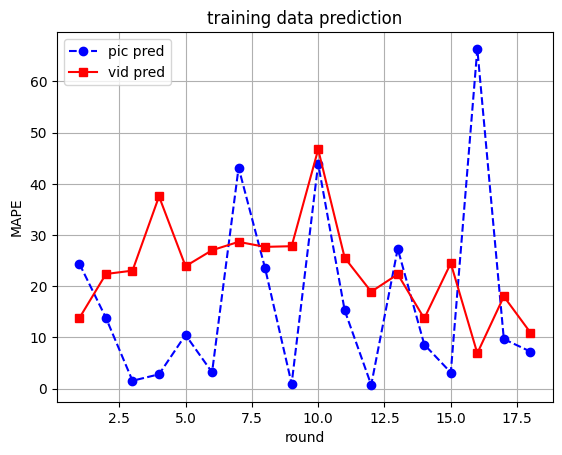

In [232]:
x = []
for i in range(len(td_pic_try)):
    x.append(i+1)
y1 = pic_MAPEs
y2 = vid_MAPEs

plt.plot(x, y1, linestyle='--', marker='o', color='b', label='pic pred')
plt.plot(x, y2, linestyle='-', marker='s', color='r', label='vid pred')

plt.xlabel('round')
plt.ylabel('MAPE')
plt.title("training data prediction")
plt.legend()

plt.grid(True)
plt.show()

In [224]:
pd_root = 'test_out.csv'
pd_list =  []
with open(pd_root, newline='') as csvfile:
  pd = pd.read_csv(pd_root)

In [225]:
pd_pic = pd[pd["is Photo"] == 1]
pd_vid = pd[pd["is Video"] == 1]

In [226]:
pd_pic = pd_pic.drop(['Post Index', 'upload time', 'hashtag', 'is Photo', 'is Video', 'Pic Description'], axis=1)
pd_vid = pd_vid.drop(['Post Index', 'upload time', 'hashtag', 'is Photo', 'is Video', 'Pic Description'], axis=1)
pd_pic = pd_pic.dropna(axis = 0)
pd_vid = pd_vid.dropna(axis = 0)
pd_pic = pd_pic.loc[:, ['followers', 'days_diff', 'hashtag_count', 'Comment Count', 'Like Count']]
pd_vid = pd_vid.loc[:, ['followers', 'days_diff', 'hashtag_count', 'Comment Count', 'Like Count']]
pd_pic = pd_pic.to_numpy()
pd_vid = pd_vid.to_numpy()
pd_pic = to_log(pd_pic)
pd_vid = to_log(pd_vid)

In [229]:
pic_cnt = 0
vid_cnt = 0
pd_pic_MAPEs = []
pd_vid_MAPEs = []

In [230]:
for i in range(len(td_pic_try)):
    td_pic_train = td_pic_try[pic_cnt]
    pic_cnt+=1
    pic_train_datalist, pic_val_datalist = SplitData(td_pic_train, 0.8)
    print(pic_train_datalist.shape[0], pic_val_datalist.shape[0])
    w_pic = Regression(pic_train_datalist)
    pic_MAPE = DoPrediction(w_pic, pd_pic)
    pd_pic_MAPEs.append(pic_MAPE)
    print(pd_pic_MAPEs)

    td_vid_train = td_vid_try[vid_cnt]
    vid_cnt+=1
    vid_train_datalist, vid_val_datalist = SplitData(td_vid_train, 0.8)
    print(vid_train_datalist.shape[0], vid_val_datalist.shape[0])
    w_vid = Regression(vid_train_datalist)
    vid_MAPE = DoPrediction(w_vid, pd_vid)
    pd_vid_MAPEs.append(vid_MAPE)
    print(pd_vid_MAPEs)

127 32
Iteration 99999, Cost: 0.4165520002084831, y_pre: 2.5788876454230563, error: 0.4165520002084831
[ 0.05107984  0.42572136 -0.00767884  0.60548034  0.76949018]
[ 0.42572136 -0.00767884  0.60548034  0.76949018]
3.7432424234932293 4.121878449801776
9.186006596743665
[9.186006596743665]
272 68
Iteration 99999, Cost: 0.9293406365241553, y_pre: 4.025720405514916, error: 0.9293406365241553
[ 0.24292994  0.80296858 -0.02011261 -0.36439113  0.6669804 ]
[ 0.80296858 -0.02011261 -0.36439113  0.6669804 ]
5.173525627172883 4.05272849488924
27.655371774769588
[27.655371774769588]
839 210
Iteration 99999, Cost: 0.48488647905634735, y_pre: 3.1686155461796957, error: 0.48488647905634735
[0.20225007 0.49688562 0.14733052 0.16901765 0.57000502]
[0.49688562 0.14733052 0.16901765 0.57000502]
3.879913315273567 4.121878449801776
5.870263703187203
[9.186006596743665, 5.870263703187203]
807 202
Iteration 99999, Cost: 1.003126804631284, y_pre: 3.9218807993102884, error: 1.003126804631284
[ 0.15767777  0.6

In [231]:
print(min(pd_pic_MAPEs))
print(min(pd_vid_MAPEs))

0.25756786256179276
0.11425968408297471


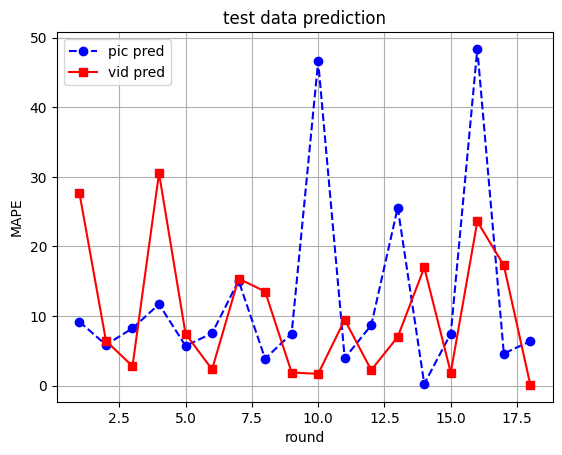

In [233]:
x = []
for i in range(len(td_pic_try)):
    x.append(i+1)
y1 = pd_pic_MAPEs
y2 = pd_vid_MAPEs

plt.plot(x, y1, linestyle='--', marker='o', color='b', label='pic pred')
plt.plot(x, y2, linestyle='-', marker='s', color='r', label='vid pred')

plt.xlabel('round')
plt.ylabel('MAPE')
plt.title("test data prediction")
plt.legend()

plt.grid(True)
plt.show()

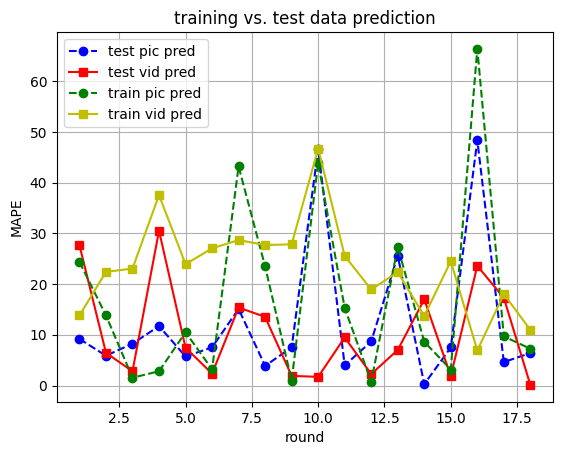

In [237]:
x = []
for i in range(len(td_pic_try)):
    x.append(i+1)
y1 = pd_pic_MAPEs
y2 = pd_vid_MAPEs
y3 = pic_MAPEs
y4 = vid_MAPEs

plt.plot(x, y1, linestyle='--', marker='o', color='b', label='test pic pred')
plt.plot(x, y2, linestyle='-', marker='s', color='r', label='test vid pred')
plt.plot(x, y3, linestyle='--', marker='o', color='g', label='train pic pred')
plt.plot(x, y4, linestyle='-', marker='s', color='y', label='train vid pred')

plt.xlabel('round')
plt.ylabel('MAPE')
plt.title("training vs. test data prediction")
plt.legend()

plt.grid(True)
plt.show()